Some of the code in this lab copied from the solution at https://github.com/learn-co-curriculum/dsc-bias-variance-trade-off-lab/tree/solution

# Bias-Variance Trade-Off - Lab

## Introduction

In this lab, you'll practice your knowledge on the bias-variance trade-off!

## Objectives

You will be able to: 
- Look at an example where Polynomial regression leads to overfitting
- Understand how bias-variance trade-off relates to underfitting and overfitting

## Let's get started!

In this lab, you'll try to predict some movie revenues based on certain factors, such as ratings and movie year.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
df.head()

,Unnamed: 0,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


In [2]:
# Only keep four predictors and transform the with MinMaxScaler

scale = MinMaxScaler()
df = df[[ "domgross", "budget", "imdbRating", "Metascore", "imdbVotes"]]
transformed = scale.fit_transform(df)
pd_df = pd.DataFrame(transformed, columns = df.columns)
pd_df.head()

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,domgross,budget,imdbRating,Metascore,imdbVotes
0,0.055325,0.034169,0.839506,0.500000,0.384192
1,0.023779,0.182956,0.000000,0.000000,0.000000
2,0.125847,0.066059,1.000000,1.000000,1.000000
3,0.183719,0.252847,0.827160,0.572917,0.323196
4,0.233625,0.157175,0.925926,0.645833,0.137984


## Split the data into a test and train set

In [3]:
# domgross is the outcome variable
new_df = pd_df.copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(['domgross'], axis=1), new_df['domgross'], test_size=0.3)

In [4]:
#Your code here
X_train.head()

,budget,imdbRating,Metascore,imdbVotes
13,0.056948,0.901235,0.812500,0.318099
26,0.658314,0.925926,0.770833,0.899595
25,0.703872,0.000000,0.000000,0.000000
2,0.066059,1.000000,1.000000,1.000000
0,0.034169,0.839506,0.500000,0.384192


## Fit a regression model to the training data and look at the coefficients

In [5]:
# Your code 
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [6]:
reg.coef_

array([0.96717778, 0.04820279, 0.13485249, 0.29273233])

## Plot the training predictions against the actual data (y_hat_train vs. y_train)

Let's plot our result for the train data. Because we have multiple predictors, we can not simply plot the income variable X on the x-axis and target y on the y-axis. Lets plot 
- A line showing the diagonal of y_train. The actual y_train values are on this line
- Next, make a scatter plot that takes the actual y_train on the x-axis and the predictions using the model on the y-axis. You will see points scattered around the line. The vertical distances between the points and the lines are the errors.

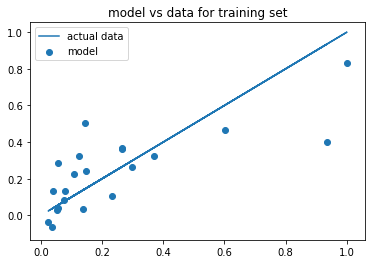

In [11]:
# this cell of code was copied from the solution at https://github.com/learn-co-curriculum/dsc-bias-variance-trade-off-lab/tree/solution
import matplotlib.pyplot as plt
%matplotlib inline
# your code here
plt.plot(y_train, y_train, label='actual data')
plt.scatter(y_train, reg.predict(X_train), label='model')
plt.title('model vs data for training set')
plt.legend()
plt.show();

## Plot the test predictions against the actual data (y_hat_test vs. y_test)

Do the same thing for the test data.

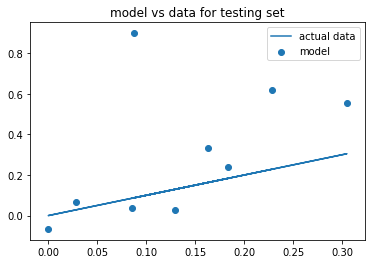

In [15]:
# This cell of code was copied from the solution at https://github.com/learn-co-curriculum/dsc-bias-variance-trade-off-lab/tree/solution
plt.plot(y_test, y_test, label='actual data')
plt.scatter(y_test, reg.predict(X_test), label='model')
plt.title('model vs data for testing set')
plt.legend()
plt.show();

## Calculate the bias
Create a function `bias` to calculate the bias of a models predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  


In [17]:
# This cell of code was copied from the solution at https://github.com/learn-co-curriculum/dsc-bias-variance-trade-off-lab/tree/solution
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat - y)

## Calculate the variance
Create a function `variance` to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [18]:
# This cell of code was copied from the solution at https://github.com/learn-co-curriculum/dsc-bias-variance-trade-off-lab/tree/solution
def variance(y_hat):
    return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2

## Use your functions to calculate the bias and variance of your model. Do this separately for the train and test sets.

In [19]:
# code for train set bias and variance
print(bias(y_train, reg.predict(X_train)))
print(variance(reg.predict(X_train)))
# Bias: 2.901719268906659e-17 
# Variance: 0.027449331056376085

5.220691603892105e-17
0.043288164463462835


In [20]:
# code for test set bias and variance
print(bias(y_test, reg.predict(X_test)))
print(variance(reg.predict(X_test)))
# Bias: 0.05760433770819166 
# Variance: 0.009213684542614783

0.16701737190906593
0.09561882355567587


## Describe in words what these numbers can tell you.

In [21]:
# Your description here
# The training set has very low bias
# The bias and variance seem to be low

# This cell of code was copied from the solution at https://github.com/learn-co-curriculum/dsc-bias-variance-trade-off-lab/tree/solution

#These numbers indicate that the bias increases, but the variance
#decreases. This indicates that the model is not overfitting, however
#it might be overfitting.


## Overfit a new model by creating additional features by raising current features to various powers.

Use `PolynomialFeatures` with degree 3. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

$ \text{Budget} * \text{MetaScore} ^ 2 $

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape`. Quite a few!


In [23]:
# This cell of code was copied from the solution at https://github.com/learn-co-curriculum/dsc-bias-variance-trade-off-lab/tree/solution
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

np.shape(X_train_poly)

(21, 35)

## Plot your overfitted model's training predictions against the actual data

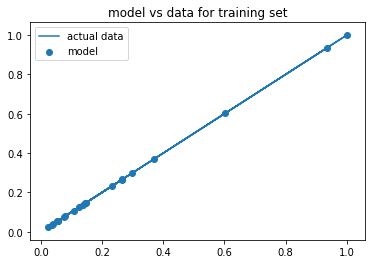

In [24]:
# This cell of code was copied from the solution at https://github.com/learn-co-curriculum/dsc-bias-variance-trade-off-lab/tree/solution

reg = LinearRegression()
reg.fit(X_train_poly, y_train)
plt.plot(y_train, y_train, label='actual data')
plt.scatter(y_train, reg.predict(X_train_poly), label='model')
plt.legend()
plt.title('model vs data for training set')
plt.show();

Wow, we almost get a perfect fit!

## Calculate the bias and variance for the train set

In [25]:
# your code here
print(bias(y_train, reg.predict(X_train_poly)))
print(variance(reg.predict(X_train_poly)))
# Bias: -2.5421584029769207e-16 
# Variance: 0.07230707736656222

-7.054542135639016e-16
0.07426853597367303


## Plot your overfitted model's test predictions against the actual data.

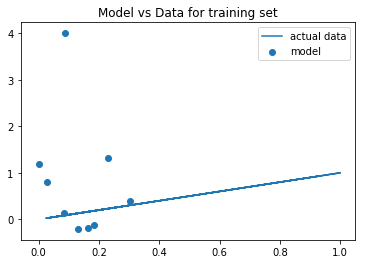

In [27]:
# This cell of code was copied from the solution at https://github.com/learn-co-curriculum/dsc-bias-variance-trade-off-lab/tree/solution
plt.plot(y_train, y_train, label='actual data')
plt.scatter(y_test, reg.predict(X_test_poly), label='model')
plt.legend()
plt.title('Model vs Data for training set')
plt.show()

##  Calculate the bias and variance for the test set.

In [28]:
# your code here
print(bias(y_test, reg.predict(X_test_poly)))
print(variance(reg.predict(X_test_poly)))
# Bias: -0.16998568902304564 
# Variance: 0.3596092440273582

0.6838989622164873
1.56929397418834


## Describe what you notice about the bias and variance statistics for your overfit model

In [29]:
# This cell of code was copied from the solution at https://github.com/learn-co-curriculum/dsc-bias-variance-trade-off-lab/tree/solution# This cell of code was copied from the solution at https://github.com/learn-co-curriculum/dsc-bias-variance-trade-off-lab/tree/solution

# the bias and variance bost increased dramatically for the test set

## Level Up - Optional

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by just adding a few polynomials. Feel free to experiment and see how bias and variance improve!

## Summary

This lab gave you insight into how bias and variance change for a training and a test set by using a pretty "simple" model, and a very complex model. 